# [E-04] NLP: Natural Language Processing
## 작사가 인공지능 만들기
### 학습 목표
* 인공지능이 문장을 이해하는 방식과 작문을 가르치는 법 배우기

### 목차
#### 1.  들어가며   
  1-1. 자연어 처리       
  1-2. 토큰화   
  1-3. 벡터화   
  1-4. 텐서   
  1-5. 원-핫 인코딩   
#### 2. 작사가 인공지능    
  2-1. 데이터 준비   
  2-2. 데이터 정제      
  2-3. 데이터 분리 및 객체 생성   
  2-4. 모델 학습  
  2-5. 모델 평가   
#### 3. 회고
3-1. 종합정리      
3-2. 이번 프로젝트에서 어려웠던 점    
3-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점     
3-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들     
3-5. 앞으로 더 공부할 내용    
3-6. 궁금한 사항    
3-7. 참고사이트   

<br/>

---
### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 가사 텍스트 생성 모델이 정상적으로 작동하는가?|텍스트 제너레이션 결과가 그럴듯한 문장으로 생성되는가?|
|2. 데이터의 전처리와 데이터셋 구성 과정이 체계적으로 진행되었는가?|특수문자 제거, 토크나이저 생성, 패딩처리 등의 과정이 빠짐없이 진행되었는가?|
|3. 텍스트 생성모델이 안정적으로 학습되었는가?|텍스트 생성모델의 Validation loss가 2.2 이하로 낮아졌는가?|   

----


## 1. 들어가며
### 1-1. 자연어 처리(NLP: Natural Language Processing)   
* 자연어란 우리가 일상 생활에서 사용하는 언어를 말함
* 자연어 처리란 이러한 자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 일
* 자연어 처리는 음성 인식, 내용 요약, 번역, 사용자의 감성 분석, 텍스트 분류 작업(스팸 메일 분류, 뉴스 기사 카테고리 분류), 질의 응답 시스템, 챗봇과 같은 곳에서 사용되는 분야
* 자연어 처리는 기계에게 인간의 언어를 이해시킨다는 점에서 인공지능에서 가장 의미있는 연구 분야이면서도 아직도 정복되어야 할 산이 많은 분야.
* 자연어 처리에서 사용할 코퍼스(Corpus: 말뭉치) 데이터가 필요에 맞게 전처리 되지 않은 상태라면, 해당 데이터를 사용하고자하는 용도에 맞게 토큰화(Tokenization) & 정제(Cleaning) & 정규화(Normalization) 해야함

### 1-2. 토큰화(Tokenize)   
* 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업  

### 1-3. 벡터화(Vectorize)   
* 자연어를 컴퓨터가 이해할 수 있도록 벡터로 만들어주는 것을 뜻하며 자연어를 벡터화 하는 방법은 크게 두 가지로 나뉨
  * 등장 횟수 기반의 단어 표현(Counte-based Representation) : 단어가 문서(혹은 문장)에 등장하는 횟수를 기반으로 벡터화 하는 방법
    * Bag-of-Words
    * TF-IDF
  * 분포 기반의 단어 표현 ( Distributed Representation) : 타겟 단어 주변에 있는 단어를 벡터화 하는 방법
    * Word2Vec
    * Glove
    * fastText

### 1-4. 텐서(Tensor)
* 벡터화를 통해 숫자로 변환된 데이터를 의미. **데이터의 배열**
* 텐서의 Rank는 몇 차원이 배열인가를 의미
* 텐서플로우로 만든 모델의 입출력 데이터는 실제로 모두 텐서로 변환되어 처리됨 
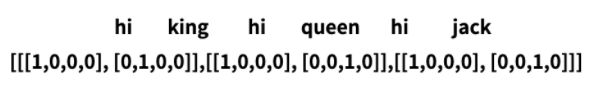
  * 위 모델은 (3, 2, 4)의 3차원 Tensor

### 1-5. 원-핫 인코딩(One-Hot Encoding)
* 주어진 카테고리 중 단 하나만 1(True), 나머지는 모두 0(False)로 나타나도록 인코딩하는 방식  
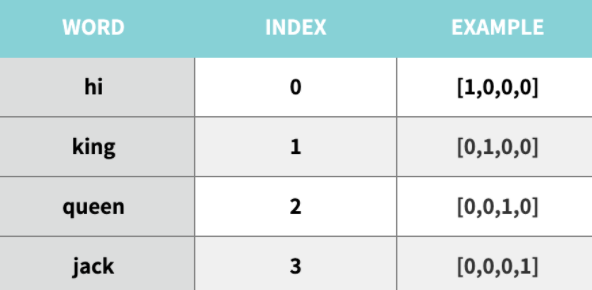
  * Hi King Hi Queen Hi Jack 문장 각각을 One-Hot Encoding으로 벡터화한 것
    

## 2. 작사가 인공지능
### 2-1. 데이터 준비   
**glob 라이브러리**
* glob 모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환함
* 조건에 정규식을 사용할 수 없으며 엑셀 등에서도 사용할 수 있는 '*' & '?'같은 와일드카드 만을 지원함

* glob 를 활용하여 모든 txt 파일을 읽어온 후, raw_corpus 리스트에 문장 단위로 저장


In [1]:
import glob
import os, re 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#### 데이터 불러와서 확인하기
* lyrics 폴더 안에 있는 모든 파일을 다 불러왔습니다. 
* 가져온 가사 txt 파일이 총 몇 개인지 궁금해서 count 변수를 이용해 확인하였습니다.

In [2]:
txt_file_path = os.getenv('HOME')+ \
       '/aiffel/Exploration/E_04/lyricist/data/lyrics/*'

txt_list = glob.glob(txt_file_path)

raw_corpus = []

count = 0
for txt_file in txt_list:
    count += 1
    with open(txt_file, "r") as f:
        raw = f.read().splitlines()
        raw_corpus.extend(raw)
        
print("불러온 가사의 개수: {}개".format(count))
print("데이터 크기:", len(raw_corpus))
print("Examples:\n", raw_corpus[:3])

불러온 가사의 개수: 49개
데이터 크기: 187088
Examples:
 ["Now I've heard there was a secret chord", 'That David played, and it pleased the Lord', "But you don't really care for music, do you?"]


### 2-2. 데이터 정제
#### 문장 생성에 적합한 모양새로 데이터를 정제하기

#### preprocess_sentence( ) 

* 추가로 지나치게 긴 문장은 다른 데이터들이 과도한 Padding을 갖게 하므로 제거
* 너무 긴 문장은 노래 가사 작사하기에 어울리지 않음
* 문장을 토큰화 했을 때 토큰의 개수가 15개를 넘어가는 문장을 학습 데이터에서 제외하기

#### 정제하는 방법
1. 소문자로 바꾸고, 양쪽 공백을 지웁니다   
```python
sentence = sentence.lower().strip()  
```
2. 특수문자 양쪽에 공백을 넣고   
```python
sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence)  
```
3. 여러개의 공백은 하나의 공백으로 바꿉니다   
```python
sentence = re.sub(r'[" "]+', " ", sentence)  
```
4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다   
```python
sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence)  
```  
5. 다시 양쪽 공백을 지웁니다   
```python
sentence = sentence.strip()  
``` 
6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다   
```python
sentence = '<start> ' + sentence + ' <end>'  
```

In [3]:
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) 
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) 
    sentence = sentence.strip()
    sentence = '<start> ' + sentence + ' <end>'
    return sentence

print(preprocess_sentence("This @_is ;;;sample        sentence."))


<start> this is sample sentence . <end>


#### 정제된 문장 모으기
**corpus 리스트에 문장을 추가하며 제외할 문장은?**
* 단어가 아무것도 없는 공백인 문장
* 토큰이 15개 이상인 문장

In [4]:
corpus = []

for sentence in raw_corpus:
    if len(sentence) == 0: continue
    # if sentence[-1] == ":": continue
    
    preprocessed_sentence = preprocess_sentence(sentence)
    word_list = preprocessed_sentence.split()
    if len(word_list) > 17: continue
    corpus.append(preprocessed_sentence)

corpus[:10]
len(corpus)

163714

#### 새롭게 시도한 것 💡
* 연습에서 사용했던 데이터는 각본이었기 때문에 :로 끝나는 문장은 제외했습니다.
* 아래 : 를 포함하는 문장을 출력했을 때, 학습시킬만한 문장들이 출력되었습니다.
* 모델을 학습시킬 때 원래 있던 코드를 주석처리하여 함께 학습할 수 있도록 포함하였습니다.


* : 이 포함된 문장을 학습시키지 않을 때의 데이터 수: 163,488
* : 이 포함되어있던 문장도 :를 제거한 후 학습시킬 때의 데이터 수: 163,714

#### 콜론( : )이 포함된 문장 출력해보기

In [5]:
for sentence in raw_corpus:
    if len(sentence) == 0: continue
    if sentence[-1] == ":": 
        print(sentence)

Slow is in my blood I always liked it slow:
With you it's got to go:
A lifetime in your eyes I always liked it slow:
With you it's got to go:
Wherever thou lodgest, I will lodge:
And the desert far away:
Écris cent fois les mots «Je t'aime»:
Tellin’ ev’ryone in the neighborhood:
JW: Another bill from a killer turned a thrill into a tragedy CHORUS:
Let this moment be the first chapter:
We like our Mike and this is why:
[SAME TIME:
But if U ain't hip 2 the rare house quake:
Question:
{on top of:
And he says:
La zharl la mimoun la gozel REFRAIN:
La zherl la mimoun la gozel REFRAIN:
La zherl la mimoun la gozel REFRAIN:
Hsabt el rnilioun ou rIa mendarga REFRAIN:
Y estoy pensando que voy a perder, Estribillo:
Porque yo he estado creo que me voy a perder Estribillo:
Me estás volviendo loco! Estribillo:
[ Lyrics from:
And I've been thinking that I'm gonna lose it, Chorus:
Cause I've been thinking that I'm gonna lose it Chorus:
driving me insane! Chorus:
His love is all she knows, all she knows

### 토큰화(Tokenize)
#### tokenize 함수
* corpus를 이용해 tokenizer 내부의 단어장을 완성합니다.
* tokenize() 함수로 corpus 데이터를 Tensor로 변환합니다.
* sklearn 모듈의 train_test_split() 함수를 사용해 훈련 데이터와 평가 데이터를 분리합니다. 
* 입력 데이터의 시퀀스 길이를 일정하게 맞춰줍니다.
* 단어장의 크기는 12,000 이상 으로 설정합니다.
* 시퀀스가 짧다면 문장 뒤에 패딩을 붙여 길이를 맞춰줍니다. (padding = 'pre')
* 총 데이터의 20% 를 평가 데이터셋으로 사용

In [6]:

def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words = 12000, 
        filters = ' ',
        oov_token = "<unk>"
    )
    
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus) 
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding = 'post')  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)


[[   2   50    4 ...    0    0    0]
 [   2   15 2930 ...    0    0    0]
 [   2   32    7 ...    0    0    0]
 ...
 [   2  261  192 ...    0    0    0]
 [   2  132    4 ...   10 1070    3]
 [   2    7   34 ...    0    0    0]] <keras_preprocessing.text.Tokenizer object at 0x7f1e32255370>


* pad_sequences - 최대길이 제한 가능


In [7]:
print(tensor[:3, :10])


[[   2   50    4   95  308   62   55    9  972 6004]
 [   2   15 2930  870    5    8   11 6005    6  358]
 [   2   32    7   37   16  164  289   28  336    5]]


In [8]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : <start>
3 : <end>
4 : i
5 : ,
6 : the
7 : you
8 : and
9 : a
10 : to


#### 마지막 처리
* 앞에 start 부분과 마지막 토큰 자르기

In [9]:
src_input = tensor[:, :-1]
tgt_input = tensor[:, 1:]
print(src_input[0])
print(tgt_input[0])

[   2   50    4   95  308   62   55    9  972 6004    3    0    0    0
    0    0]
[  50    4   95  308   62   55    9  972 6004    3    0    0    0    0
    0    0]


### 2-3. 데이터 분리 및 객체 생성
#### 훈련 데이터와 평가 데이터 분리

In [10]:
enc_train, enc_val, dec_train, dec_val = train_test_split(src_input, 
                                                          tgt_input, 
                                                          test_size = 0.2,
                                                          random_state = 42)

In [11]:
print("Source Train:", enc_train.shape)
print("Target Train:", dec_train.shape)
src_input.shape

Source Train: (130971, 16)
Target Train: (130971, 16)


(163714, 16)

소스 문장 (Source Sentence): 입력 문장   
타겟 문장 (Target Sentence): 출력 문장   

#### 데이터셋 객체 생성

In [12]:
BUFFER_SIZE = len(src_input)
BATCH_SIZE = 256
steps_per_epoch = len(src_input) // BATCH_SIZE

VOCAB_SIZE = tokenizer.num_words + 1   

dataset = tf.data.Dataset.from_tensor_slices((src_input, tgt_input))
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
dataset

<BatchDataset shapes: ((256, 16), (256, 16)), types: (tf.int32, tf.int32)>

### 2-4. 모델 학습
#### tk.keras.Model을 Subclassing 하기
* Embedding Size
  * 워드 벡터의 차원수, 즉 단어가 추상적으로 표현되는 크기
  * 값이 커질수록 단어의 추상적인 특징들을 더 잡아낼 수 있지만, 데이터가 그만큼 주어지지 않으면 혼란스러움
  * 이번 실습에서는 256이 적당
  
  
* Hidden Size
  * 모델에 얼마나 많은 일꾼들을 둘것인가?
  
  
* 10 Epoch 안에 Validation Loss를 2.2 수준으로 줄이기
* tokenizer가 구축한 단어사전 내 7000개와, 여기 포함되지 않은 0: `<pad>`를 포함하여 7001개


In [13]:
class TextGenerator(tf.keras.Model):
    def __init__(self, vocab_size, embedding_size, hidden_size):
        super().__init__()
        
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_size)
        self.rnn_1 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.rnn_2 = tf.keras.layers.LSTM(hidden_size, return_sequences=True)
        self.linear = tf.keras.layers.Dense(vocab_size)
        
    def call(self, x):
        out = self.embedding(x)
        out = self.rnn_1(out)
        out = self.rnn_2(out)
        out = self.linear(out)
        
        return out
    
embedding_size = 256
hidden_size = 1024 
model = TextGenerator(tokenizer.num_words + 1, embedding_size , hidden_size)

#### 데이터 확인하기!
* 불러온 데이터 모델에 넣어보기   

In [14]:
for src_sample, tgt_sample in dataset.take(1): break

model(src_sample)

<tf.Tensor: shape=(256, 16, 12001), dtype=float32, numpy=
array([[[ 6.04754532e-05, -3.17408674e-04, -5.93198965e-05, ...,
          4.85921773e-05,  9.91483612e-05,  6.58814170e-05],
        [ 2.21638795e-04, -5.15179418e-04, -2.89937452e-04, ...,
          2.68460426e-04,  3.85733911e-05,  3.62934697e-05],
        [ 2.53398408e-04, -7.70464423e-04, -3.84641840e-04, ...,
          3.38541548e-04, -2.97492898e-05,  3.06584479e-05],
        ...,
        [ 1.25478196e-03, -2.47245724e-03, -8.50261364e-04, ...,
         -4.67942737e-04,  1.69412815e-03, -1.02016970e-03],
        [ 1.33895839e-03, -2.76151299e-03, -9.89936991e-04, ...,
         -5.59172360e-04,  2.06917292e-03, -1.06644130e-03],
        [ 1.39080104e-03, -3.01761436e-03, -1.11968850e-03, ...,
         -6.22466265e-04,  2.41546426e-03, -1.11013569e-03]],

       [[ 6.04754532e-05, -3.17408674e-04, -5.93198965e-05, ...,
          4.85921773e-05,  9.91483612e-05,  6.58814170e-05],
        [ 6.38249185e-05, -3.90034111e-04, -1

#### 학습 & Loss 확인
* 학습시키면서 Validation Loss값 확인하기

In [15]:
optimizer = tf.keras.optimizers.Adam()
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits = True, reduction = 'none')


model.compile(loss = loss, optimizer = optimizer)
model.fit(dataset, epochs = 10, validation_data = (enc_val, dec_val))


Epoch 1/10
639/639 [==============================] - 130s 200ms/step - loss: 3.1081 - val_loss: 2.7736
Epoch 2/10
639/639 [==============================] - 140s 219ms/step - loss: 2.6974 - val_loss: 2.5767
Epoch 3/10
639/639 [==============================] - 140s 219ms/step - loss: 2.5364 - val_loss: 2.4362
Epoch 4/10
639/639 [==============================] - 139s 217ms/step - loss: 2.4171 - val_loss: 2.3284
Epoch 5/10
639/639 [==============================] - 136s 213ms/step - loss: 2.3168 - val_loss: 2.2301
Epoch 6/10
639/639 [==============================] - 135s 211ms/step - loss: 2.2271 - val_loss: 2.1437
Epoch 7/10
639/639 [==============================] - 135s 211ms/step - loss: 2.1449 - val_loss: 2.0625
Epoch 8/10
639/639 [==============================] - 135s 211ms/step - loss: 2.0682 - val_loss: 1.9870
Epoch 9/10
639/639 [==============================] - 135s 211ms/step - loss: 1.9964 - val_loss: 1.9179
Epoch 10/10
639/639 [==============================] - 135s 211m

### 2-5. 모델 평가
#### 문장 생성 함수 generate_text( ) 
* 테스트를 위해 입력받은 init_sentence도 텐서로 변환해야합니다.

#### 문장 생성 과정   
1. 입력받은 문장의 텐서를 입력합니다   
2. 예측된 값 중 가장 높은 확률인 word index를 뽑아냅니다   
3. 2에서 예측된 word index를 문장 뒤에 붙입니다    
4. 모델이 <end>를 예측했거나, max_len에 도달했다면 문장 생성을 마칩니다       
* tokenizer를 이용해 word index를 단어로 하나씩 변환합니다 
    
    
    

In [33]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)
    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor) 
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1] 
        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)
        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

generate_text(model, tokenizer, 
              init_sentence="<start> Oh ", max_len = 20)


'<start> oh , oh , oh , oh <end> '

In [17]:
model.summary()

Model: "text_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  3072256   
_________________________________________________________________
lstm (LSTM)                  multiple                  5246976   
_________________________________________________________________
lstm_1 (LSTM)                multiple                  8392704   
_________________________________________________________________
dense (Dense)                multiple                  12301025  
Total params: 29,012,961
Trainable params: 29,012,961
Non-trainable params: 0
_________________________________________________________________


## 3. 회고 

### 3-1. 종합정리
#### 숫자 15
|입력|출력|
|:---|:---|
|I love|'<start> i love you <end> ' |
|We have|'<start> we have the power <end> '|
|I think|'<start> i think i m a wolf <end> '|
|oh|'<start> oh , i believe in god <end> '|

#### 숫자 17
    
|입력|출력|
|:---|:---|
|I love|'<start> i love you , i love you <end> '|
|We have|'<start> we have the power <end> '|
|I think|'<start> i think i m a voodoo child <end> '|
|oh|'<start> oh , oh , oh , oh <end> '|

#### 정리
**토큰의 개수가 15개를 넘어가는 문장**   
* **'문장을 토큰화 했을 때 토큰의 개수가 15개를 넘어가는 문장을 학습 데이터에서 제외하기'** 라는 조건에서 앞 뒤에 붙은 <start> <end> 를 생각하지 않고 단어가 15개 이상인 것으로 코드를 작성했습니다.
* 채은(❤️‍🔥)님이랑 프로젝트에 대해 이야기하다가 <start> <end> 를 제외한 단어의 수만 15개 미만인 것으로 확인해야해서 if 조건문의 조건 숫자를 15에서 17로 변경하였습니다. if 조건문의 숫자가 15일 때는 단어의 수가 최대 13개, 숫자가 17일 때는 단어의 수가 최대 15개입니다. 
* 단어의 숫자와 관계없이 Loss / Validation Loss 는 유의미한 차이가 없었는데, 출력되는 문장에서 차이가 있었습니다. 
* 단어의 개수가 15개인 경우, Oh 를 입력했을 때, '<start> oh , i believe in god <end> '를 출력했는데, 17개인 경운, '<start> oh , oh , oh , oh <end> '를 출력했습니다.
* 작사를 한다고 생각했을 때에는 15개인 경우가 Oh라는 단어를 입력했을 때에는 완전한 문장을 만들어 주었는데, 다른 단어들에 대해서는 직접 테스트를 해봐야한다고 생각합니다.
    
### 3-2. 이번 프로젝트에서 어려웠던 점
* 첫 자연어처리 프로젝트라서 새로운 내용이라 쉽지 않았습니다. (하지만 재밌었어요!💕)
* 데이터 정제가 익숙치 않아서 어려웠지만 이번에 제대로 정리하고 가는 느낌이에요.
* 토큰 개념이 아직은 완벽히 숙지되지 않아서 어려웠어요. 앞으로 더 공부하도록 하겠습니다. 💪🏾         
<br/>
<br/>

### 3-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점
#### 중복 문장 관련
* 데이터 정제 과정에서 중복된 문장은 한 번만 학습시켜야한다고 생각했습니다. 그래서 아래 코드를 작성하여 제거한 후, 학습을 시켜보았는데요. 

```python

set_raw_corpus = set(raw_corpus)
raw_corpus_2 = list(set_raw_corpus)

```

* 중복된 문장 제거한 후 학습시켰을 때  
  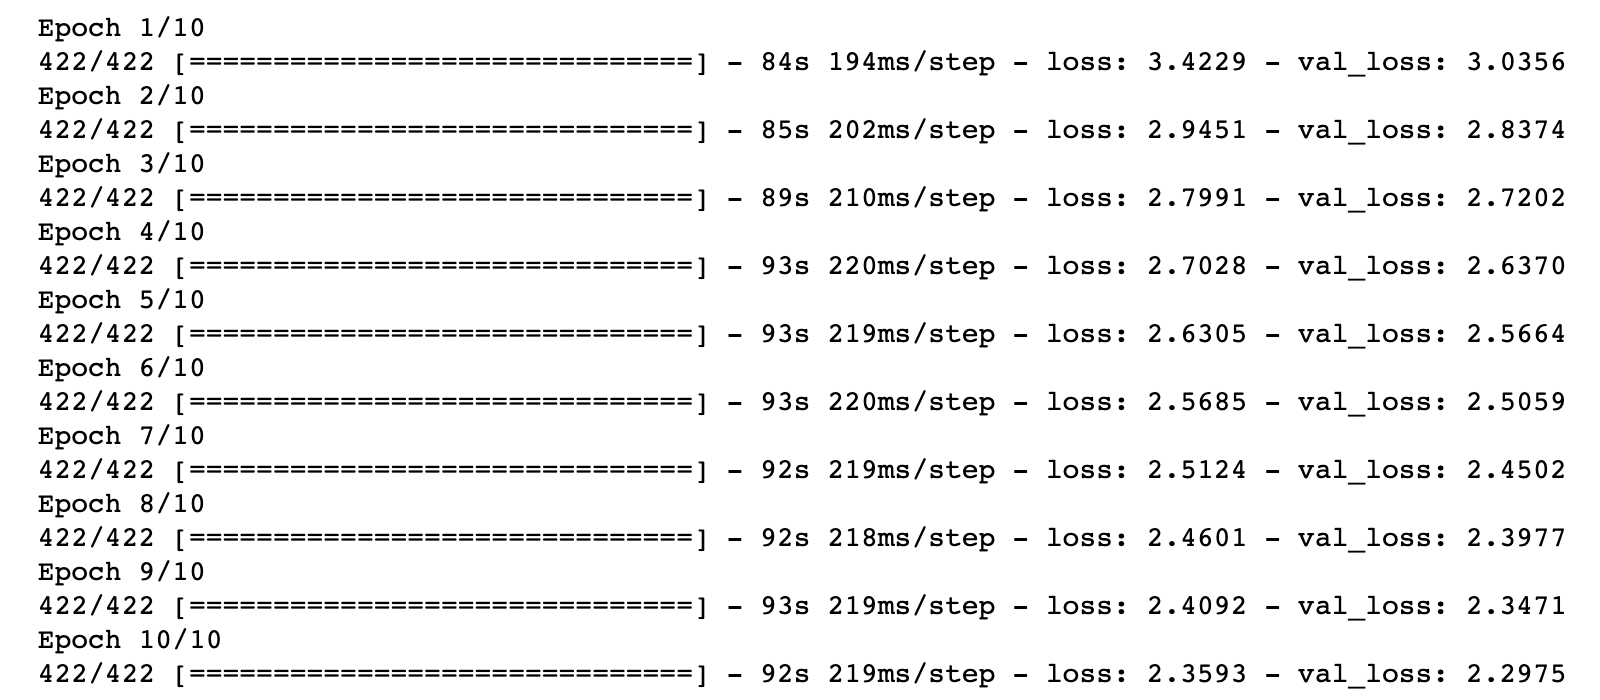
* 중복된 문장을 제거하고 학습시켰을 때 결과가 더 나빴습니다.
* 아지트에 지훈님이 올려주신 글을 보고 비슷한 파일명에 대한 고민을 하다가 이야기를 나누었는데요. 학습시킬 때, 중복 데이터를 모두 제거할 필요 없이 그대로 학습시켜도 괜찮지 않을까 라는 결론을 내렸습니다. 
* 그래서 중복 문장을 거르지 않고, 모두 포함하여 데이터를 정제했습니다.   
  
  **결과**
  * 중복문장 제거했을 때의 결과: loss: 2.3593 - val_loss: 2.2975
  * 중복문장 제거하지 않았을 때의 결과: loss: 1.9293 - val_loss: 1.8532 
    
#### Epoch & Loss 그래프
* 진환님, 채은님, 휴민님과 이야기하며 Epoch & Loss 값의 관계를 나타내는 그래프를 그릴 수 있는 history 에 대해 새롭게 알게되었습니다. 
   
<br/>
<br/>

### 3-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들
* 처음에 중복문장을 제거한 후 진행했다가 결과 확인 후 다시 넣어서 학습시키고 검증하였습니다.
* 토큰이 15개 이상인 경우, if-continue 를 사용해서 문장 제외하였습니다.    
* Embedding Size와 Hidden Size를 적당한 숫자로 조절하였습니다.      
<br/>
<br/>

### 3-5. 앞으로 더 공부할 내용
* 자연어 처리  
* 데이터 정제 및 정규화
<br/>
<br/>

### 3-6. 궁금한 사항
* 아포스트로피 (apostrophe, ')가 모두 생략된 채 문장이 학습 및 출력되었습니다. 더 자연스러운 문장, 완벽한 문장을 만들기 위해 줄임말의 아포스트로피는 생략하지 않는 방법을 생각해보겠습니다.
* 교육장에서 다른 교육생분들하고 많은 이야기를 나누었는데요. 저는 따로 하이퍼 파라미터값을 변경하지 않고 진행했을 때에도 Validation Loss 값이 2.2이하로 나와서 어떤 차이가 있는건지도 궁금합니다. (정말 랜덤인지...? 😂)


### 3-7. 참고사이트

* 토큰이 15개 이상인 경우   
https://www.kite.com/python/answers/how-to-count-the-number-of-words-in-a-string-in-python


* 파일명이 비슷하거나 잘못 인코딩된 문장에 대한 처리 (지훈님 아지트 글! 👍🏾)  
https://aiffel.agit.io/g/300308438/wall/327378410


* 벡터화(Vectorize)   
https://velog.io/@ljs7463/자연어처리NLP-텍스트전처리벡터화


* 자연어 처리   
https://wikidocs.net/21667
    
    
* 토큰화 (Tokenization)   
https://wikidocs.net/21698
    
    
* Tensor란 무엇인가?   
https://rekt77.tistory.com/102]


* loss, optimizer   
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers   
https://www.tensorflow.org/api_docs/python/tf/keras/losses


* model.fit test/val Data 활용하기   
https://blog.naver.com/PostView.nhn?blogId=bosongmoon&logNo=221794986775&parentCategoryNo=&categoryNo=75&viewDate=&isShowPopularPosts=false&from=postView

    
* Keras - History 기능 사용하기    
https://snowdeer.github.io/machine-learning/2018/01/11/keras-use-history-function/  
    
<br/>
<br/>

